## 5.4	Ein neuronales Netz mit TensorFlow und Keras aufbauen und anlernen

In [ ]:
!git clone https://github.com/tpanneck/hanser_deep_nlp

In [ ]:
%cd hanser_deep_nlp/05_Deep_Learning_Essentials/

### 01 - Daten laden (Tumorzellen-Studie)

In [13]:
from os.path import join
import numpy as np
import pandas as pd

path = '../Data'
file = 'breast_cancer_wisconsin.csv'

df = pd.read_csv(join(path, file))
df = df.drop('id', axis=1)
df.head()

,clump thickness,uniformity cell size,uniformity cell shape,marginal adhesion,epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,label
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign


### 02 - Skalierung der Features (x-Daten)

#### a) Vorbereitung: X und y aus *DataFrame* separieren. y-Variable als Integer codieren

In [14]:
X = df[['clump thickness', 'uniformity cell size', 'uniformity cell shape',
       'marginal adhesion', 'epithelial cell size', 'bare nuclei',
       'bland chromatin', 'normal nucleoli', 'mitoses']]
y = df['label'].map(lambda x: 1 if x=='malignant' else 0)
X.shape, y.shape

((683, 9), (683,))

#### b) Unterteilung in Train- Testpartitionen
Standardisiert wird mit Mittelwert und Standardabweichung der Trainingsdaten!

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((546, 9), (137, 9), (546,), (137,))

### c) Standardisieren

In [16]:
from sklearn.preprocessing import StandardScaler

# Anlernen des Scalers
scaler = StandardScaler()
scaler.fit(X_train)

# Transformation der Daten
X_train_sd = scaler.transform(X_train)
X_test_sd = scaler.transform(X_test)

# Überprüfen (Mittelwert sollte spaltenweise=0 sein, Standardabweichung spaltenweise=1)
X_train_sd.mean(axis=0).round(3), X_train_sd.std(axis=0).round(3)

(array([-0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.]))

### 03 - Neuronales Netz mit *Keras* aufbauen

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=9, input_shape=(9,), activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 100 (400.00 Byte)
Trainable params: 100 (400.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 04 - Modell kompilieren (Verlustfunktion und Optimierer festlegen)

In [18]:
model.compile( loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

### 05 - Anlernprozess starten

In [ ]:
history = model.fit( X_train_sd, y_train,
                     epochs=100,
                     batch_size=32,
                     validation_data=(X_test_sd, y_test) )

### 06 - History darstellen

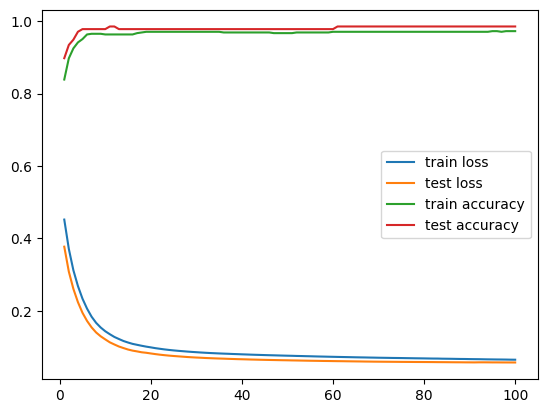

In [20]:
import matplotlib.pyplot as plt

val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.plot(epochs, train_acc, label='train accuracy')
plt.plot(epochs, val_acc, label='test accuracy')
plt.legend()

### 07 - Schätzungen durchführen

In [ ]:
# Schätzbeispiel
X_pred = [[4., 2., 1., 1., 2., 1., 2., 1., 1.]]

# Standardisieren nicht vergessen!
X_pred_sd = scaler.transform(X_pred)

# predict und predict_classes-Methode (Achtung: depricated)
y_pred = model.predict_classes(X_pred_sd)
y_pred_prob = model.predict(X_pred_sd)

# Ausgabe der Schätzergebnisse (0=benign, 1=malignant)
y_pred, y_pred_prob